In [ ]:
#Заходим в наш гуглдрайв
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


##Web scrapping

In [ ]:
import requests 
from bs4 import BeautifulSoup

#Указываем путь к нашей папке
path = r"/content/drive/My Drive/CSS/"

#с помощью try,except перерабатываем данные
with open(path + 'result.csv', 'w', encoding='utf-8') as file:
  file.write("Названия,Цена,Ссылка на товар,Рейтинг,Код товара\n")#Пишем названия данных

def get_data(pages):  
  result = ''
  numb = 0
  for i in range(1, pages+1):
    url = f'https://www.sulpak.kz/f/smartfoniy?page={i}'
    r = requests.get(url = url).text
    soup = BeautifulSoup(r, 'lxml')

    links = soup.find_all('div', class_='product-container-right-side')
    for link in links:
      url = f'https://www.sulpak.kz{link.find("a").get("href")}'
      r = requests.get(url = url).text
      soup = BeautifulSoup(r, 'lxml')

      title = soup.find('h1', class_='product-container-title').text
      price = soup.find('div', class_='current-price').text
      link = url  
      score = soup.find('div', {'id':'write-new-comment'}).previous_sibling.previous_sibling.get('data-score')
      code = soup.find('div', class_='product-code-container').find('span').text
      
      result += f'{title},{price},{link},{score},{code}\n'
      numb += 1 
      print(f'Парсим карту - {numb}')

  return result

def save_data():
  pages = int(input('Enter the number of pages for scrapping: '))
  result = get_data(pages)
  print('Парсинг завершён.')
  with open(path +'result.csv', 'a', encoding='utf-8') as file:
    file.write(result)
  exit()

if __name__ == "__main__": #Запускаем код.
    save_data()

Enter the number of pages for scrapping: 1


In [ ]:
import requests 
from bs4 import BeautifulSoup


try:
  with open(path+'result.csv', 'w', encoding='utf-8') as file:
    file.write("Названия,Цена,Ссылка на товар,Рейтинг,Код_товара\n")

  def get_data(pages):  
    result = ''
    numb = 0
    for i in range(1, pages+1):
      url = f'https://www.sulpak.kz/f/smartfoniy?page={i}'
    
      r = requests.get(url = url).text
    
      soup = BeautifulSoup(r, 'lxml')

      links = soup.find_all('div', class_='product-container-right-side')
      for link in links:  
        url = f'https://www.sulpak.kz{link.find("a").get("href")}'
        r = requests.get(url = url).text
        soup = BeautifulSoup(r, 'lxml')

        title = soup.find('h3', class_='product-container-title').text
        price = soup.find('div', class_='current-price').text
        link = url  
        score = soup.find('div', {'id':'write-new-comment'}).previous_sibling.previous_sibling.get('data-score')
        code = soup.find('div', class_='product-code-container').find('span').text
        
        result += f'{title},{price},{link},{score},{code}\n'
        numb += 1 
        print(f'Parsing the map - {numb}')

    return result

  def save_data():
    pages = int(input('Enter the number of pages for scrapping: '))
    result = get_data(pages)
    print('Parsing completed.')
    with open(path+'result.csv', 'a', encoding='utf-8') as file:
      file.write(result)
    exit()

  if __name__ == "__main__":  
      save_data()
except:
  pass

Enter the number of pages for scrapping: 1


##Pandas Data

In [ ]:
import pandas as pd

path = r"/content/drive/My Drive/CSS/"

df = pd.read_csv("https://raw.githubusercontent.com/AizereA/csv.file/main/FILE")

df.head(6) 

,Названия,Цена,Ссылка на товар,Рейтинг,Код_товара
0,Смартфон ОРРО Reno5 Fantasy Silver,213 490 тг,https://www.sulpak.kz/Goods?title=smartfon_orr...,5.0,487644
1,Смартфон ОРРО Reno5 Starry Black,177 890 тг,https://www.sulpak.kz/Goods?title=smartfon_orr...,5.0,487643
2,Смартфон Samsung Galaxy Note 20 Gray,429 890 тг,https://www.sulpak.kz/Goods?title=smartfon_sam...,5.0,467447
3,Смартфон Huawei P40 Lite Midnight Black,111 890 тг,https://www.sulpak.kz/Goods?title=smartfon_hua...,4.6,459926
4,Смартфон ОРРО Reno5 Lite Fantastic Purple,160 990 тг,https://www.sulpak.kz/Goods?title=smartfon_orr...,4.3,487642
5,Смартфон ОРРО Reno5 Lite Fluid Black,159 690 тг,https://www.sulpak.kz/Goods?title=smartfon_orr...,4.7,487641


In [ ]:
df2 = df.head(31)
df2.columns

Index(['Названия', 'Цена', 'Ссылка на товар', 'Рейтинг', 'Код_товара'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Названия         62 non-null     object 
 1   Цена             62 non-null     object 
 2   Ссылка на товар  62 non-null     object 
 3   Рейтинг          62 non-null     float64
 4   Код_товара       62 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


##Draw diagrams

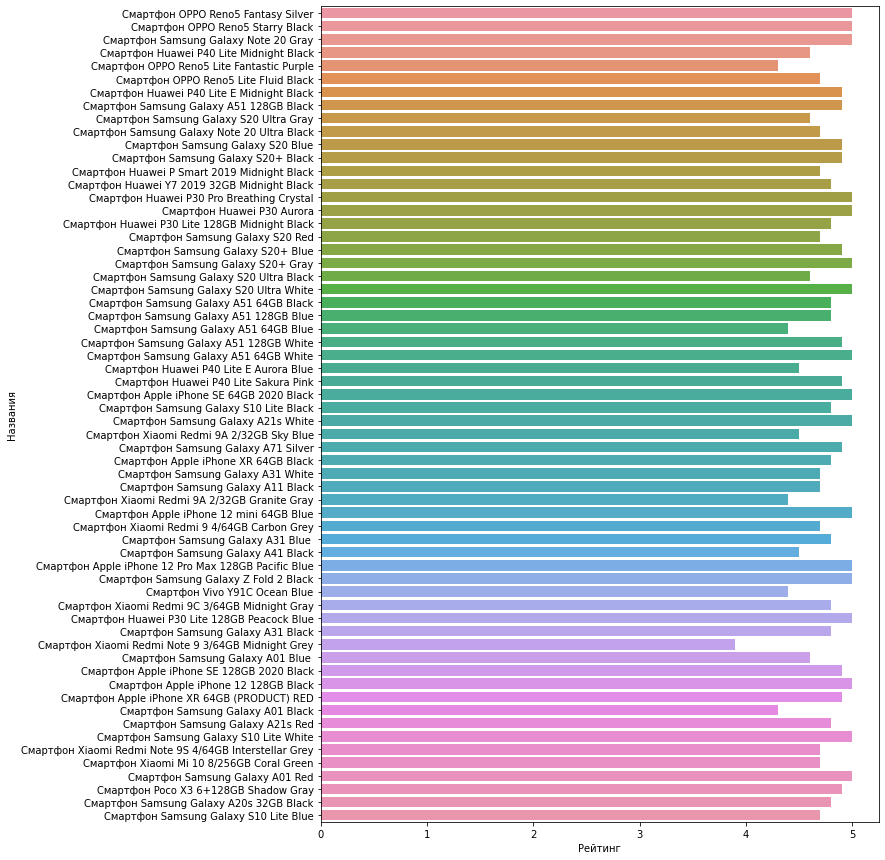

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os 

%matplotlib inline
figure = plt.figure(figsize=(10,15))   
#Using isin (), we took data from the variable A
A = df.Цена.value_counts().sort_values(ascending = True).index.values
sns.barplot(y="Названия", x="Рейтинг",data=df[df.Цена.isin(A)]);
figure.savefig("Diagram1.png")

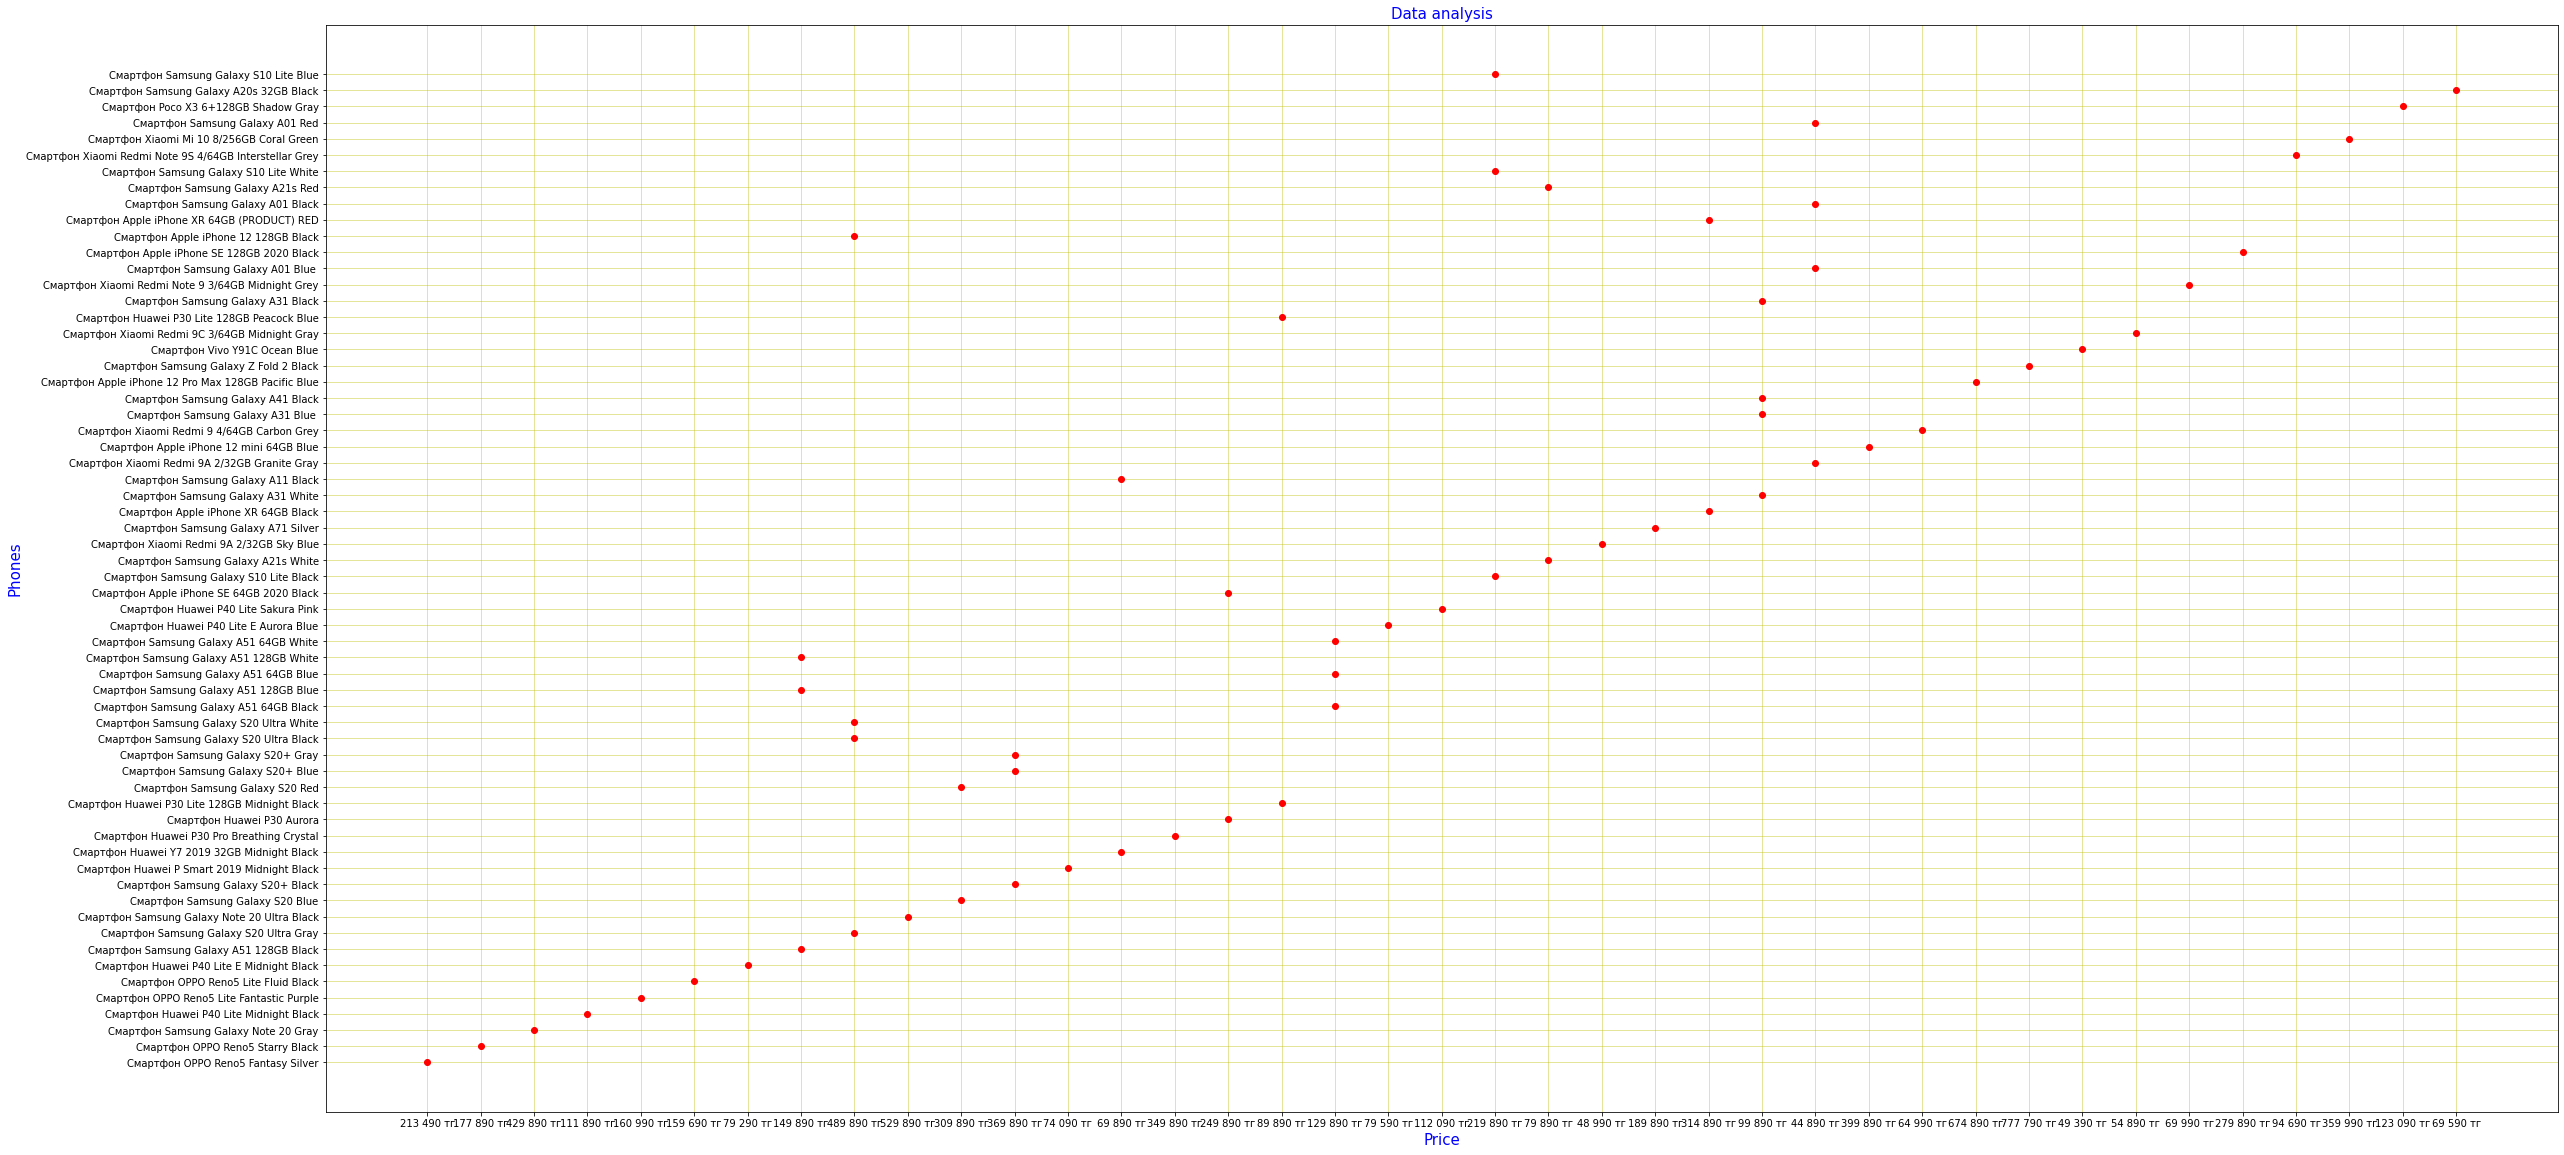

In [ ]:
import os

%matplotlib inline
figure = plt.figure(figsize=(40,20))
plt.plot(df['Цена'],df['Названия'],'ro')
plt.xlabel("Price",fontsize=15,color="blue")
plt.ylabel("Phones",fontsize=15,color="blue")
plt.grid(color='y',alpha=0.4,linestyle='solid',linewidth=1)
plt.title("Data analysis",fontsize=15,color='blue');
os.chdir(path)
figure.savefig('Diagram2.png')

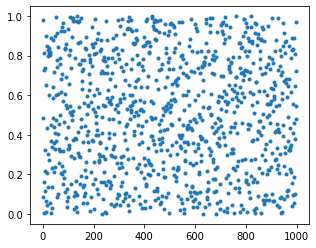

In [ ]:
import numpy as np
%matplotlib inline
figure = plt.figure(figsize=(5,4))
Diagramm = pd.DataFrame({'Цена': np.random.uniform(size=1000)})
#1000 points in dataframe('Price')
Diagramm['Цена'].plot(style='.');

figure.savefig('Diagram3.png')

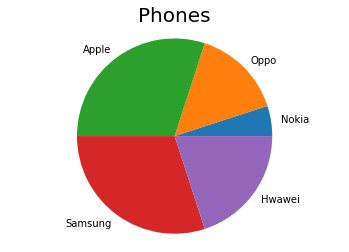

In [ ]:
#Тут мы не работаем с данными df
vals = [5, 15, 30, 30, 20]
#А просто демонстрируем знания о плоте sublots
labels = ["Nokia", "Oppo", "Apple", "Samsung", "Hwawei"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
ax.set_title('Phones',fontsize=20);
fig.savefig('Diagram4.png')